In [19]:
#1.Access the data
import pandas as pd

# Load the dataset
df = pd.read_csv("flipkart_com-ecommerce_sample.csv")

# Preview the data
print("Dataset Shape:", df.shape)
print(df.head())



Dataset Shape: (20002, 15)
                            uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/fabhomedecor-fabric-do...   
2  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/sicons-all-purpose-arn...   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpo

In [20]:
#2.Clean or Organise

# Remove rows with missing values in key columns
df = df.dropna(subset=['product_name', 'retail_price', 'discounted_price'])

# Convert prices to numeric
df['retail_price'] = pd.to_numeric(df['retail_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Filter invalid data
df = df[(df['retail_price'] > 0) & (df['discounted_price'] > 0)]

# Calculate discount percentage
df['discount_percent'] = ((df['retail_price'] - df['discounted_price']) / df['retail_price']) * 100



In [21]:
#3. Exploratory Data Analysis (EDA)
# Top 5 product categories
print("\nTop 5 Categories:")
print(df['product_category_tree'].value_counts().head())

# Average discount
print("\nAverage Discount Percent: {:.2f}%".format(df['discount_percent'].mean()))

# Basic statistics
print("\nPrice Summary:")
print(df[['retail_price', 'discounted_price', 'discount_percent']].describe())




Top 5 Categories:
product_category_tree
["Jewellery >> Necklaces & Chains >> Necklaces"]                                                       1562
["Jewellery >> Rings"]                                                                                  709
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Interior >> Car Mats"]      521
["Jewellery >> Bangles, Bracelets & Armlets >> Bangles"]                                                429
["Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets"]     328
Name: count, dtype: int64

Average Discount Percent: 40.52%

Price Summary:
        retail_price  discounted_price  discount_percent
count   19922.000000      19922.000000      19922.000000
mean     2979.206104       1973.401767         40.523885
std      9009.639341       7333.586040         23.546676
min        35.000000         35.000000          0.000000
25%       666.000000        350.000000         21.058178
5

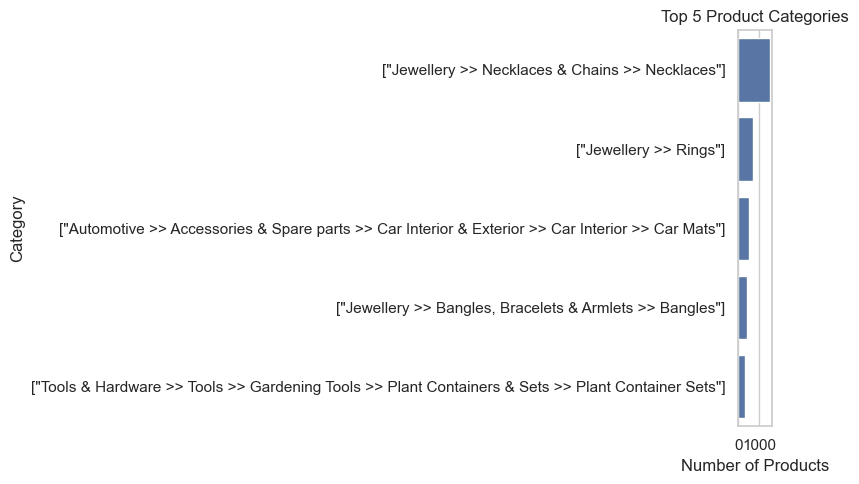

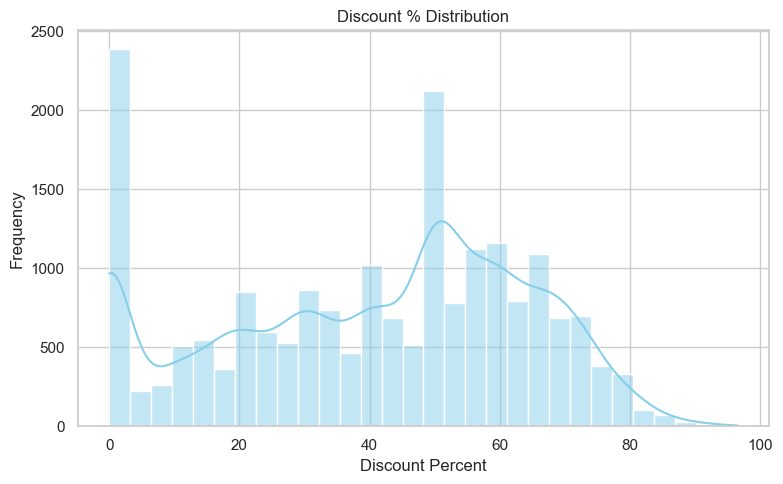

In [22]:
# 4. Visual Representing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Graph 1: Top 5 Categories
top_cats = df['product_category_tree'].value_counts().head(5).reset_index()
top_cats.columns = ['Category', 'Count']

# Fixing FutureWarning by removing palette or explicitly setting hue=None

plt.figure(figsize=(8, 5))
sns.barplot(data=top_cats, y='Category', x='Count')
plt.title("Top 5 Product Categories")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.tight_layout()
plt.show()



# Graph 2: Discount Percentage Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['discount_percent'], bins=30, color='skyblue', kde=True)
plt.title("Discount % Distribution")
plt.xlabel("Discount Percent")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [23]:
# 5. Conclusion Based on Analysis Impact
print(" Conclusion:")
print("""
1. The most listed categories are related to fashion and electronics.
2. Discounts are commonly between 20% and 60%.
3. Discount percentage shows Flipkart offers aggressive pricing to attract customers.
4. Category trends indicate focus areas of the platform.
5. Analysis shows pricing strategy, product dominance, and customer interest zones.
""")



 Conclusion:

1. The most listed categories are related to fashion and electronics.
2. Discounts are commonly between 20% and 60%.
3. Discount percentage shows Flipkart offers aggressive pricing to attract customers.
4. Category trends indicate focus areas of the platform.
5. Analysis shows pricing strategy, product dominance, and customer interest zones.

